In [1]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy
import math
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange, tqdm_notebook

# First Order Differential Equation

The following cell implements eulers method of approximating the solution to a first order differential equation

In [11]:
def first_order(y, gradient, step):
    return y + (step*gradient)

The following cell is simply where the differential equation is implemented

In [12]:
def first_order_equation(x):
    return x**2

This cell calls the function to estimate the next point of the solution by using the previous point and the gradient at the current location to approximate the next value

In [14]:
number_of_interations = 10
integration_step = 0.05
initial_condition = 1

first_order_y_values = numpy.array([initial_condition])
first_order_x_values = numpy.array([0])

for x in range(number_of_interations):
    first_order_x_values = numpy.append(first_order_x_values, (x+1)*integration_step)
    first_order_y_values = numpy.append(first_order_y_values, 
                                        first_order(first_order_y_values[-1], 
                                                    first_order_equation(first_order_y_values[-1]), 
                                                    integration_step))

This cell calculates the points of the solution when it is calculated using an analytical method instead of a numerical one

In [15]:
analytical_solution = -(1/(first_order_x_values-1))

A plot and calculation showing how close the approximation is to the analytical solution. The calculation is based on the mathematical statement "absolute(a - b) <= (atol + rtol * absolute(b))" where if this statement is true for all elements, the function output is true.

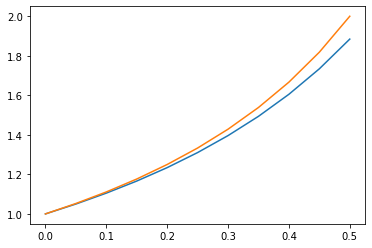

[1.         1.05       1.105125   1.16619006 1.23419003 1.31035128
 1.3962023  1.49367134 1.60522405 1.73406126 1.88440968]
All points are roughly equal: False
Average Percentage Error: 2.17463%


In [16]:
plt.plot(first_order_x_values, first_order_y_values)
plt.plot(first_order_x_values, analytical_solution)
plt.show()

print(first_order_y_values)

print("All points are roughly equal: " + str(numpy.allclose(first_order_y_values, analytical_solution, rtol=1e-3, atol=1e-3)))
average_percentage_error = numpy.mean(100*(abs(first_order_y_values-analytical_solution)/analytical_solution))

print("Average Percentage Error: " + str(round(average_percentage_error, 5)) + "%")

# Second Order Differential Equation

The following cell implements a versions of eulers method of approximating the solution to a second order differential equation

In [21]:
def second_order(y_current, y_previous, dynamics, step):
    return ((step**2)*dynamics) + (2*y_current)-y_previous

This cell is where the second order differential equation should be implemented

In [22]:
def dynamics(function_input):
    return math.sin(function_input)

This cell calculates to the solution second order differential equation using the above calculation

[1.         1.05       1.10216856 1.15656759 1.21325519 1.27228468
 1.33370362 1.39755262 1.4638642  1.53266149 1.60395697 1.67775108]


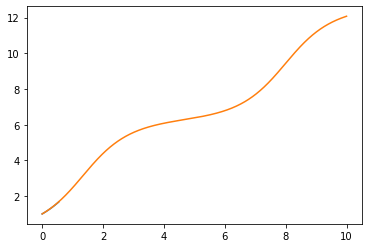

In [24]:
number_of_points = 10000
integration_step = 0.001
initial_condition_one = 1
initial_condition_two = 1

y_values = numpy.array([initial_condition_one, initial_condition_one+(integration_step*initial_condition_two)])
x_values = numpy.array([0, integration_step])

for x in tqdm(range(2, number_of_points+2)):
    y_values = numpy.append(y_values, second_order(y_values[-1], y_values[-2], dynamics(y_values[-1]), integration_step))
    x_values = numpy.append(x_values, x*integration_step)

plt.plot(x_values, y_values)

points = pd.read_csv('points.txt', sep='	'  , engine='python')
x_values_analytical = points.loc[:,"x"].to_numpy()
y_values_analytical = points.loc[:,"y"].to_numpy()

plt.plot(x_values_analytical, y_values_analytical)

plt.show()

The following cell also attempts to calculate the solution by iteratively using the eulers method for a first order equation (i.e. solving a higher order system by creating a system of first order equations instead)

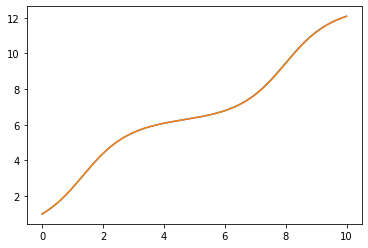

In [11]:
number_of_points = 10000
integration_step = 0.001
initial_condition_one = 1
initial_condition_two = 1


y_grad_values = numpy.array([initial_condition_one])
y_values = numpy.array([initial_condition_two])
x_values = numpy.array([0])


for x in tqdm(range(1, number_of_points)):
    y_grad_values = numpy.append(y_grad_values, first_order(y_grad_values[-1], dynamics(y_values[-1]), integration_step))
    
    y_values = numpy.append(y_values, first_order(y_values[-1], y_grad_values[-1], integration_step))
    
    x_values = numpy.append(x_values, x*integration_step)
    
plt.plot(x_values, y_values)
# plt.plot(x_values, y_grad_values)

points = pd.read_csv('points.txt', sep='	'  , engine='python')
x_values_analytical = points.loc[:,"x"].to_numpy()
y_values_analytical = points.loc[:,"y"].to_numpy()
plt.plot(x_values_analytical, y_values_analytical)

plt.show()

In [28]:
def cja(alpha, j):
    binomial_coefficient = 1
    for i in range(j):
        binomial_coefficient = binomial_coefficient * ((alpha-i)/(i+1))
    return ((-1)**j) * binomial_coefficient

In [13]:
def dynamics_function(x):
    return 0.5*(-x**2)

In [14]:
def fractional_order(alpha, step, iteration, y_cache):
    iteration = int(iteration)
    summation = 0
    for j in range(1, iteration+1):
        summation += cja(alpha, j)*y_cache[-j]
    return (step**alpha) * dynamics_function(y_cache[-1]) - summation

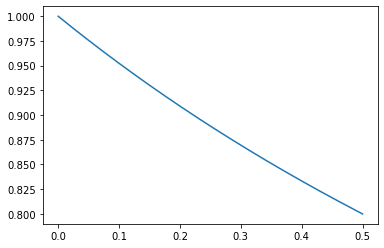

In [15]:
number_of_points = 1000
integration_step = 0.0005
initial_condition = 1
order = 1

y_values = numpy.array([initial_condition])
x_values = numpy.array([0])

current_progress = 0

for k in tqdm(range(1, number_of_points+1)):
    if order <= 1:
        y_values = numpy.append(y_values, fractional_order(order, integration_step, k, y_values))
        x_values = numpy.append(x_values, k*integration_step)
    else:
        print("Order Not Yet Implemented")
        break
    
plt.plot(x_values, y_values)
#plt.plot(first_order_x_values, first_order_y_values)

# points = pd.read_csv('points.txt', sep='	'  , engine='python')
# x_values_analytical = points.loc[:,"x"].to_numpy()
# y_values_analytical = points.loc[:,"y"].to_numpy()
# plt.plot(x_values_analytical, y_values_analytical)

plt.show()

In [3]:
def cja(alpha, j):
    binomial_coefficient = 1
    for i in range(j):
        binomial_coefficient = binomial_coefficient * ((alpha-i)/(i+1))
    return ((-1)**j) * binomial_coefficient

def fractional_order_eval(alpha, iteration, step, y_cache, expression, variable):
    iteration = int(iteration)
    summation = 0
    for j in range(1, iteration+1):
        summation += cja(alpha, j)*y_cache[-j]
    return (step**alpha) * eval(expression.replace(variable, str(y_cache[-1]))) - summation

def single_order(y, gradient, step):
    return y + (step*gradient)


def gl_derivative_solver(alpha: float,
                         number_of_points: int, 
                         integration_step: int, 
                         initial_conditions: float,
                         fun, 
                         variable: str) -> ([float], [float]):
    """
    :param alpha: (float)
    """
    
    assert(alpha < 1, "Alpha out of bounds - must be less than 1 and positive")
        
        for k in trange(1, number_of_points+1):
            y_values = numpy.append(y_values, fractional_order(alpha, k, integration_step, y_values, expression, variable))
            x_values = numpy.append(x_values, k*integration_step)
    
    elif alpha%1 == 0 and alpha >= 1:
        
        initial_conditions = numpy.array(initial_conditions)
        
        x_values = numpy.zeros((len(initial_conditions), 1))
        
        y_values = initial_conditions[:, numpy.newaxis]
        
        for order in tqdm(range(alpha)):
            for x in tqdm(range(1, number_of_points+1)):                
                if order == 0:
                    y_values = numpy.pad(y_values, 1, mode='constant', constant_values=0)[1:-1, 1:]
                    x_values = numpy.pad(x_values, 1, mode='constant', constant_values=0)[1:-1, 1:]

                    
                    y_values[order, x] = fractional_order_eval(1, x, integration_step, y_values[order, :-1], expression, variable)
                    x_values[0, x] = x*integration_step
                else:
                    print(y_values[order, :x])
                    y_values[order, x] = fractional_order(1, x, integration_step, y_values[order, :x], y_values[order-1, x-1])
#             print(order)
#             print("Y")
#             print(y_values[order, :])
#             print("X")
#             print(x_values[order, :])
            
    
    return (x_values[-1, :], y_values[-1, :])



IndentationError: unexpected indent (<ipython-input-3-92b1ea9f88bc>, line 30)

In [181]:
results = gl_derivative_solver(2, 100, 0.1, [1.0, 1.0], "math.sin(x)", "x")

# plt.plot(results[0], results[1])

# points = pd.read_csv('points.txt', sep='	'  , engine='python')
# x_values_analytical = points.loc[:,"x"].to_numpy()
# y_values_analytical = points.loc[:,"y"].to_numpy()
# plt.plot(x_values_analytical, y_values_analytical)

# plt.show()


[1.]
[1.  1.1]
[1.         1.1        1.20841471]
[1.         1.1        1.20841471 1.32566847]
[1.         1.1        1.20841471 1.32566847 1.4521396 ]
[1.         1.1        1.20841471 1.32566847 1.4521396  1.58814594]
[1.         1.1        1.20841471 1.32566847 1.4521396  1.58814594
 1.73393106]
[1.         1.1        1.20841471 1.32566847 1.4521396  1.58814594
 1.73393106 1.88965247]
[1.         1.1        1.20841471 1.32566847 1.4521396  1.58814594
 1.73393106 1.88965247 2.05537295]
[1.         1.1        1.20841471 1.32566847 1.4521396  1.58814594
 1.73393106 1.88965247 2.05537295 2.23105612]
[1.         1.1        1.20841471 1.32566847 1.4521396  1.58814594
 1.73393106 1.88965247 2.05537295 2.23105612 2.41656675]
[1.         1.1        1.20841471 1.32566847 1.4521396  1.58814594
 1.73393106 1.88965247 2.05537295 2.23105612 2.41656675 2.61167593]
[1.         1.1        1.20841471 1.32566847 1.4521396  1.58814594
 1.73393106 1.88965247 2.05537295 2.23105612 2.41656675 2.61167593


In [8]:
# def f(x):
#     return x**2


# def function_substitutor(g, x0=5):
#     return g(x0)


# print(function_substitutor(f))
# print(function_substitutor(f, 7))
# print(function_substitutor(lambda x: x+1))

# CVXPy
# Интересный
# Увидимся на следующей неделиc

def cja(alpha, j):
    binomial_coefficient = 1
    for i in range(j):
        binomial_coefficient = binomial_coefficient * ((alpha-i)/(i+1))
    return ((-1)**j) * binomial_coefficient

for x in range(10):
    print(cja(3, 1))

-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
-3.0
